autocorrelacion test

In [3]:
import quandl
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import json
import datetime as dt

In [4]:
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product, Quarterly
# Units: Percent of GDP, Seasonally Adjusted
# Source: FRED (Federal Reserve Bank St. Louis)

debt = quandl.get("FRED/GFDEGDQ188S", authtoken="ckJvd5G2a2dkK9nun3xS")

In [5]:
# S&P 500 Index Composite, Monthly
# Units: Index
# Source: Yale University, Online Data Robert Shiller

sp500 = quandl.get("YALE/SPCOMP", authtoken="ckJvd5G2a2dkK9nun3xS")

In [6]:
# Unemployment Rate, Monthly
# Units: Percent, Seasonally Adjusted
# Source: FRED (Federal Reserve Bank St. Louis)

u = quandl.get("FRED/M0892AUSM156SNBR", authtoken="ckJvd5G2a2dkK9nun3xS")

In [7]:
# Balance on Current Account, NIPA's, Quarterly
# Units: Billions of Dollars Seasonally Adjusted Annual Rate
# Source: FRED (Federal Reserve Bank St. Louis)

balance = quandl.get("FRED/NETFI", authtoken="ckJvd5G2a2dkK9nun3xS")

In [8]:
sp = sp500.iloc[:,:1]

In [9]:
# Get the date in a new column to be able to merge tables on Date
sp['Date'] = sp.index

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Adding a new column with t-1 (lag) values to calculate monthly returns on S&P
sp['lag'] = sp['S&P Composite'].shift(1)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# As there is no lagged S&P for the first date we delete the first row 

to_drop = sp.iloc[:1]
sp.drop(to_drop.index, axis=0, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
# The S&P monthly returns is simply the rate of change between months ((t - t-1)/t-1)*100

sp['monthly_return_per'] = ((sp['S&P Composite']-sp['lag'])/sp['lag'])*100

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
sp.head()

,S&P Composite,Date,lag,monthly_return_per
Year,,,,
1871-02-28,4.50,1871-02-28,4.44,1.351351
1871-03-31,4.61,1871-03-31,4.50,2.444444
1871-04-30,4.74,1871-04-30,4.61,2.819957
1871-05-31,4.86,1871-05-31,4.74,2.531646
1871-06-30,4.82,1871-06-30,4.86,-0.823045


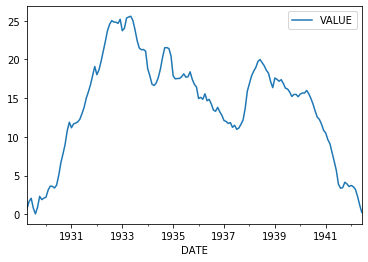

In [15]:
u.plot()

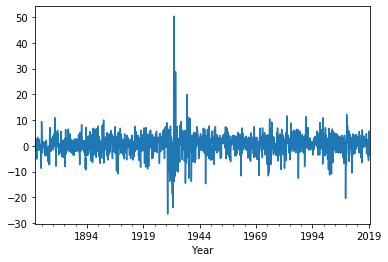

In [16]:
sp['monthly_return_per'].plot()

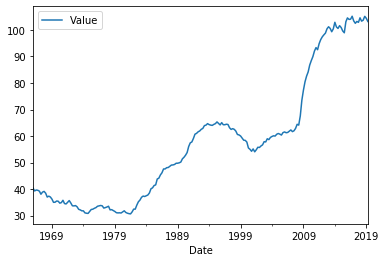

In [17]:
debt.plot()

In [23]:
balance['lag'] = balance['Value'].shift(1)

In [ ]:
balance['rate'] = 

In [24]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States')

In [33]:
df = pd.DataFrame(table[1])

In [47]:
df.columns = df.columns.droplevel(0)

In [48]:
df.columns

Index(['Presidency[a]', 'Presidency[a].1', 'President', 'President.1',
       'Prior office[b]', 'Party[c]', 'Party[c].1', 'Election',
       'Vice President'],
      dtype='object')